In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import other libraries if needed

In [117]:
df = pd.read_csv("train.csv")
df.head()

,CustomerID,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,1,41.805313,-122.946953,Female,No,Yes,No,17,Yes,No,...,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.687896,1845.463646,Yes,5159.662242
1,2,37.557421,-121.662183,Female,No,No,No,6,Yes,No,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.809145,137.340359,No,5555.255006
2,3,33.926801,-118.337288,Male,No,Yes,Yes,72,Yes,Yes,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.672564,2033.267100,No,6426.081258
3,4,33.842400,-117.522049,Male,No,No,No,11,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.551155,236.568970,No,5431.894188
4,5,33.659241,-116.560957,Female,No,No,No,56,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),105.614627,6505.861021,No,4210.224835


In [118]:
df.columns

Index(['CustomerID', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'CLTV'],
      dtype='object')

In [119]:
df.shape

(5634, 24)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5634 non-null   int64  
 1   Latitude           5634 non-null   float64
 2   Longitude          5634 non-null   float64
 3   Gender             5634 non-null   object 
 4   Senior Citizen     5634 non-null   object 
 5   Partner            5634 non-null   object 
 6   Dependents         5634 non-null   object 
 7   Tenure Months      5634 non-null   int64  
 8   Phone Service      5634 non-null   object 
 9   Multiple Lines     5634 non-null   object 
 10  Internet Service   5634 non-null   object 
 11  Online Security    5634 non-null   object 
 12  Online Backup      5634 non-null   object 
 13  Device Protection  5634 non-null   object 
 14  Tech Support       5634 non-null   object 
 15  Streaming TV       5634 non-null   object 
 16  Streaming Movies   5634 

In [121]:
df.nunique()

CustomerID           5634
Latitude             5634
Longitude            5634
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      5634
Total Charges        5626
Churn Label             2
CLTV                 5634
dtype: int64

In [122]:
df.describe()

,CustomerID,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,2817.500000,36.269710,-119.783700,32.396166,64.725332,2504.289916,4405.419906
std,1626.540039,2.461827,2.149481,24.618646,30.189317,2491.276471,1188.118436
min,1.000000,32.556115,-124.305928,0.000000,18.235191,0.000000,2001.007650
25%,1409.250000,34.030504,-121.786468,9.000000,35.317744,437.904744,3463.916945
50%,2817.500000,36.300459,-119.688426,29.000000,70.249691,1536.578453,4537.259130
75%,4225.750000,38.209293,-118.046674,56.000000,89.938891,4154.543414,5386.183285
max,5634.000000,41.967365,-114.184825,72.000000,118.612904,9353.780727,6500.684263


In [123]:
df.isnull().sum()

CustomerID           0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
CLTV                 0
dtype: int64

In [124]:
df.duplicated().sum()

0

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_grid(dataframe, n_cols=3, subplot_size=(5, 3)):
    """
    Plots a grid of boxplots for all numerical non-binary columns in a DataFrame.

    :param dataframe: pandas DataFrame to plot.
    :param n_cols: Number of columns in the grid.
    :param subplot_size: Size of each subplot (width, height).
    """
    # Identify numerical columns that are not binary (more than 2 unique values)
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object' and dataframe[col].nunique() > 2]

    # Determine the grid size (number of rows and columns in the grid)
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Computes the required number of rows

    # Create a figure with subplots in a grid
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each column
        sns.boxplot(y=dataframe[col])
        plt.title(col)
    plt.tight_layout()  # Adjusts the subplots to fit in the figure area
    plt.show()

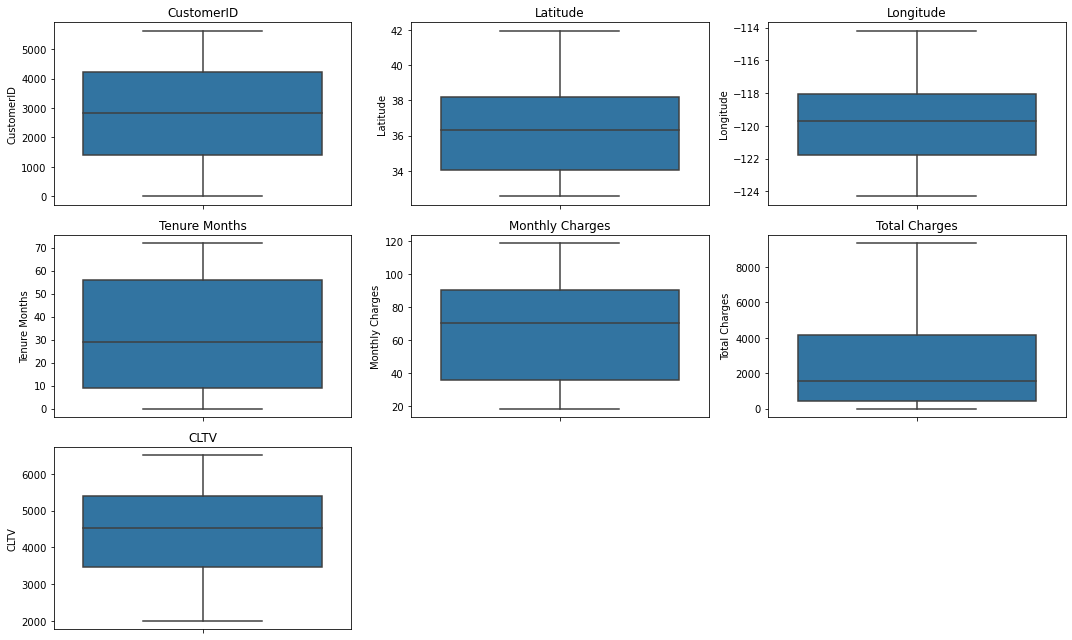

In [126]:
plot_boxplots_grid(df)

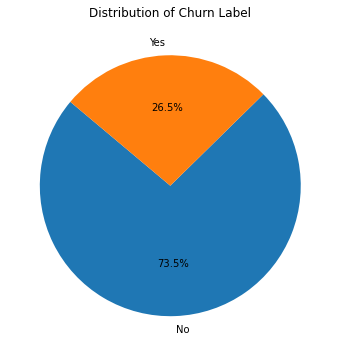

In [127]:
# Plot the distribution for target column
import matplotlib.pyplot as plt

def plot_churn_distribution(data, column='Churn Label'):
    """
    Plots the distribution of the churn label in a pie chart.

    :param data: DataFrame containing the customer data.
    :param column: Name of the column containing the churn label.
    """
    # Calculating the distribution
    churn_dist = data[column].value_counts()

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(churn_dist, labels=churn_dist.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Churn Label')
    plt.show()

# Testing the function with the customer data
plot_churn_distribution(df)

In [128]:
# Plot the distribution for each numerical columns based on the churn label

import seaborn as sns

def plot_numerical_distribution_by_churn(data, churn_column='Churn Label'):
    """
    Plots the distribution of each numerical column in the data, separated by churn label.

    :param data: DataFrame containing the customer data.
    :param churn_column: Name of the column containing the churn label.
    """
    # Identifying numerical columns
    numerical_columns = data.select_dtypes(include=['number']).columns

    # Number of rows and columns for the subplot
    n_cols = 2
    n_rows = (len(numerical_columns) + 1) // n_cols

    # Creating subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    # Plotting each numerical column
    for i, col in enumerate(numerical_columns):
        sns.histplot(data=data, x=col, hue=churn_column, ax=axes[i], kde=True, element='step')
        axes[i].set_title(f'Distribution of {col} by Churn Label')
        axes[i].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()
    plt.show()

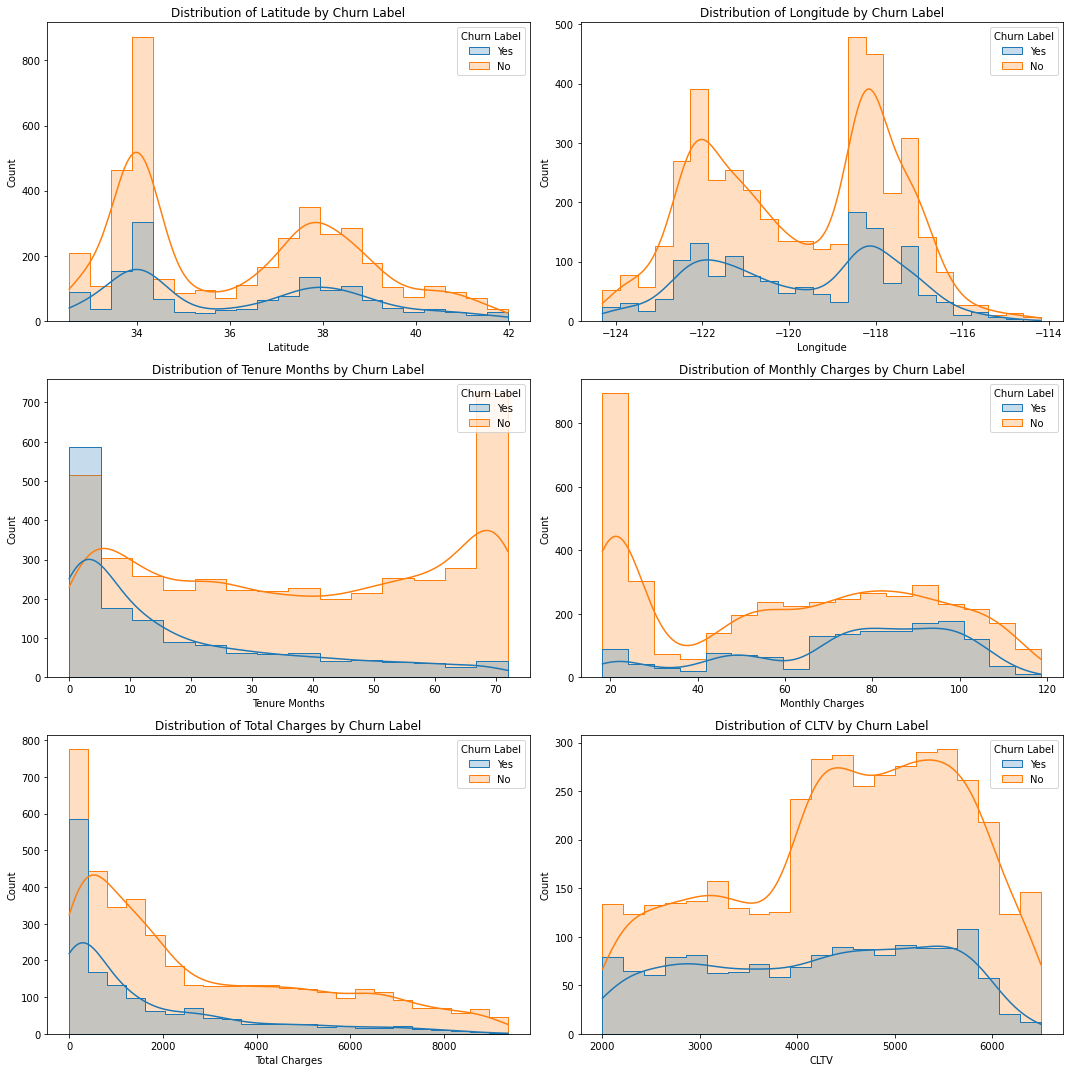

In [129]:
plot_numerical_distribution_by_churn(df[['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Churn Label']])

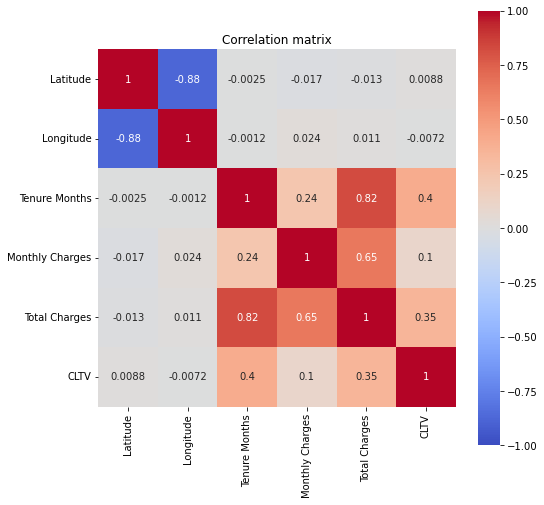

In [130]:
# Plot correlation matrix
corr = df.drop('CustomerID', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

In [131]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(df, test_size=0.2, random_state=42)
# test_size = 0.2 artinya 80% adalah training set dan 20% adalah validation set

In [132]:
train_set.shape, val_set.shape

((4507, 24), (1127, 24))

In [133]:
# Drop the columns

columns_to_drop = ['CustomerID', 'Latitude', 'Longitude']

train_set.drop(columns=columns_to_drop, inplace=True)
val_set.drop(columns=columns_to_drop, inplace=True)

train_set.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
4082,Male,No,No,No,8,No,No phone service,DSL,No,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),25.221349,221.947873,No,2371.209423
1728,Female,No,Yes,Yes,11,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.810450,251.806446,No,5358.647749
2795,Female,No,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,No,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),106.699162,7863.728271,No,4779.672648
334,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.085169,1590.745409,No,5731.611504
3625,Male,No,Yes,No,50,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.409925,5192.545868,No,5547.154067


In [134]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureCreator(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        # Explore ways to create or transform new features!

        # Create a new feature called 'Total Charges' by multiplying 'Monthly Charges' and 'Tenure Months'
        # diganti sesuai performance, tidak ada penambahan kolom atau ditambahkan kolomnya
        X['Total Charges'] = X['Monthly Charges'] * X['Tenure Months']

        return X

In [135]:
# Import necessary scalers
from sklearn.preprocessing import StandardScaler

class FeatureScaler(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        
        # Fit the scaler here
        # mengukur dan menyimpan rumus/ ukuran data
        # jangan fitting ke validation set

        self.numerical_cols = [col for col in X.columns if X[col].dtype != 'object' and X[col].nunique() > 2]
        self.sc = StandardScaler().fit(X[self.numerical_cols])
        
        return self
    
    def transform(self, X):
        
        # Perform scaling here

        X[self.numerical_cols] = self.sc.transform(X[self.numerical_cols])
        
        return X

In [136]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        
        # Encode the categorical variables here
        
        cat_cols = X.select_dtypes(include=['object'])
        
        for col in cat_cols:
            
            # Check if the column is binary
            # label encoded
            if X[col].nunique() == 2 and col != 'Gender':
                
                # Map the column with a dictionary
                X_encoded[col] = X_encoded[col].map({'Yes': 1, 'No': 0})
            
            # one-hot encoded
            else:
                # Perform one-hot encoding
                X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix=col)], axis=1)

                # Drop original categorical columns from DataFrame
                X_encoded.drop(col, axis=1, inplace=True)
        
        return X_encoded

In [137]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("featurecreator", FeatureCreator()),
                 ("scaler", FeatureScaler()),
                 ("encoder", FeatureEncoder())])

In [138]:
# Your code should work up until this point
train_set = pipe.fit_transform(train_set)

# jangan sampe di FIT, hanya transform saja
val_set = pipe.transform(val_set)

In [139]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

# Create the model
rf = RandomForestClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42)
# cat = CatBoostClassifier(random_state=42, verbose=False)

In [140]:
# Split the data into features and target
X_train = train_set.drop('Churn Label', axis=1)
y_train = train_set['Churn Label']

X_val = val_set.drop('Churn Label', axis=1)
y_val = val_set['Churn Label']

# Train the model
rf.fit(X_train, y_train)
# xgb.fit(X_train, y_train)
# cat.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [141]:
# Import the evaluation metrics
from sklearn.metrics import classification_report

# Make predictions
rf_pred = rf.predict(X_val)
# xgb_pred = xgb.predict(X_val)
# cat_pred = cat.predict(X_val)

# Print classification report for each model
print("Random Forest Classifier")
print(classification_report(y_val, rf_pred))
# print()
# print("XGBoost Classifier")
# print(classification_report(y_val, xgb_pred))
# print()
# print("CatBoost Classifier")
# print(classification_report(y_val, cat_pred))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       860
           1       0.61      0.51      0.55       267

    accuracy                           0.81      1127
   macro avg       0.73      0.70      0.71      1127
weighted avg       0.80      0.81      0.80      1127



In [143]:
import sys
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
